# Step 0: Load Packages and Libraries

In [1]:
import pandas as pd  # To perform data cleaning and data processing
import numpy as np   # To perform metrics
import matplotlib.pyplot as plt  #To perform plotting activity
import seaborn as sns   # To perform plotting activity

from sklearn.metrics.pairwise import cosine_similarity  # To find the angle between the vectors
from sklearn.feature_extraction.text import TfidfVectorizer  # To convert into vector from text


import os
from scipy.sparse import coo_matrix

# Step 1: Data Loading and Preprocessing

In [2]:
train_data = pd.read_csv('marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv',sep='\t');
train_data.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [3]:
# Selecting the required columns needed

In [4]:
train_data = train_data[['Uniq Id','Product Id','Product Rating','Product Reviews Count','Product Category','Product Brand','Product Name','Product Image Url','Product Description','Product Tags']]

In [5]:

train_data.head(2)

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,NaN,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,NaN,NaN,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."


# Basic Operations 

In [6]:
train_data.shape

(5000, 10)

In [7]:
#to check for null values

In [8]:
train_data.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Rating           2806
Product Reviews Count    1654
Product Category           10
Product Brand              13
Product Name                0
Product Image Url           0
Product Description      1127
Product Tags                0
dtype: int64

In [9]:
# Fill missing values in 'product Rating' with a default value (e.g.,0)
train_data['Product Rating'].copy().fillna(0,inplace=True)

In [10]:
# Fill missing values in 'product reviews count ' with a default value (e.g.,0)
train_data['Product Reviews Count'].fillna(0,inplace=True)

C:\Users\Vishnu\AppData\Local\Temp\ipykernel_16108\1103014075.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Product Reviews Count'].fillna(0,inplace=True)


In [11]:
# Fill missing values in 'product category ' with a default value (e.g., 'unknown')
train_data['Product Category'].copy().fillna('',inplace=True)

In [12]:
# Fill missing values in 'product brand' with a defaul value (e.g.,'unknown')
train_data['Product Brand'].fillna('',inplace=True)

C:\Users\Vishnu\AppData\Local\Temp\ipykernel_16108\4005992352.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Product Brand'].fillna('',inplace=True)


In [13]:
# Fill missing values in 'product Description ' with an empty string
train_data['Product Description'].copy().fillna('',inplace=True)

In [14]:
train_data.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Rating           2806
Product Reviews Count       0
Product Category           10
Product Brand               0
Product Name                0
Product Image Url           0
Product Description      1127
Product Tags                0
dtype: int64

In [15]:
# To check for duplicate value int the dataset

In [16]:
train_data.duplicated().sum()

0

In [17]:
# from above outplut we mean that we don't have duplicate values

In [18]:
train_data.columns

Index(['Uniq Id', 'Product Id', 'Product Rating', 'Product Reviews Count',
       'Product Category', 'Product Brand', 'Product Name',
       'Product Image Url', 'Product Description', 'Product Tags'],
      dtype='object')

In [19]:
# Now renaming the columns to make it look nice and more readable

In [20]:
#define the mapping of current column names to shorter names
column_name_mapping = {
    'Uniq Id':'ID',
    'Product Id':'ProdID',
    'Product Rating':'Rating',
    'Product Reviews Count':'ReviewCount',
    'Product Category':'Category',
    'Product Brand':'Brand',
    'Product Name':'Name',
    'Product Image Url':'ImageURL',
    'Product Description':'Description',
    'Product Tags':'Tags',
    'Product Contents':'Contents'
}
#Rename the columns using the mapping
train_data.rename(columns=column_name_mapping,inplace=True)

In [21]:
train_data.columns

Index(['ID', 'ProdID', 'Rating', 'ReviewCount', 'Category', 'Brand', 'Name',
       'ImageURL', 'Description', 'Tags'],
      dtype='object')

In [22]:
train_data.head()

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,NaN,0.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,NaN,0.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,NaN,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


In [23]:
# To extract the number part and replace  it  in id and product id

In [24]:
train_data['ID']=train_data['ID'].str.extract(r'(\d+)').astype(float)
train_data['ProdID']=train_data['ProdID'].str.extract(r'(\d+)').astype(float)

In [25]:
train_data

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,NaN,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,9.500000e+01,76.0,NaN,0.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8.000000e+00,8.0,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,4.000000e+00,3.0,NaN,0.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,9.900000e+02,3.0,NaN,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."
...,...,...,...,...,...,...,...,...,...,...
4995,2.771000e+03,208.0,4.5,2.0,Household Essentials > Air Fresheners > Spray ...,Eclectic Lady,"Garden Mint Room Spray (Double Strength), 4 ou...",https://i5.walmartimages.com/asr/0e0416ae-6b70...,"Garden Mint is a lovely blend of spearmint, le...","Garden Mint Room Spray (Double Strength), 4 ou..."
4996,0.000000e+00,1.0,3.9,7484.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Garnier,Garnier Nutrisse Nourishing Hair Color Creme (...,https://i5.walmartimages.com/asr/24d7a837-51f8...,Garnier Nutrisse Nourishing Hair Color Creme B...,Garnier Nutrisse Nourishing Hair Color Creme (...
4997,3.400000e+01,96.0,NaN,4.0,Beauty > Makeup > Nails,Stoneway,"Nail File Electric Drill, 6 in 1 Professional ...",https://i5.walmartimages.com/asr/d6202179-2c93...,Multifunctional : Our nail drill kit come with...,"Nail File Electric Drill, 6 in 1 Professional ..."
4998,9.000000e+00,7.0,NaN,0.0,Premium Beauty > Premium Bath & Body > Premium...,Creed,Creed Love In Black Hair And Body Wash 6.8oz/2...,https://i5.walmartimages.com/asr/3dc99239-66d2...,NaN,Creed Love In Black Hair And Body Wash 6.8oz/2...


# Step 2: EDA (Exploratory data anlaysis)

In [26]:
#Basic Statistics
num_users=train_data['ID'].nunique()
num_items=train_data['ProdID'].nunique()
num_ratings = train_data['Rating'].nunique()

In [27]:
print(f"Number of unique users:{num_users}")
print(f"Number of unique items:{num_items}")
print(f"Number of unique ratings:{num_ratings}")

Number of unique users:1721
Number of unique items:1697
Number of unique ratings:35


In [28]:
# Pivot the DataFrame to create a heatmap
# For calculating the heatmap we need a matrix
heatmap_data = train_data.pivot_table('ID','Rating')

In [29]:
heatmap_data

,ID
Rating,
1.0,4.810669e+05
1.3,8.000000e+00
1.5,3.315000e+02
1.8,3.517850e+04
2.0,1.834903e+06
2.1,7.099400e+05
2.2,4.666667e+00
2.3,5.533333e+02
2.4,2.563650e+04


In [30]:
# To ploat the heatmap

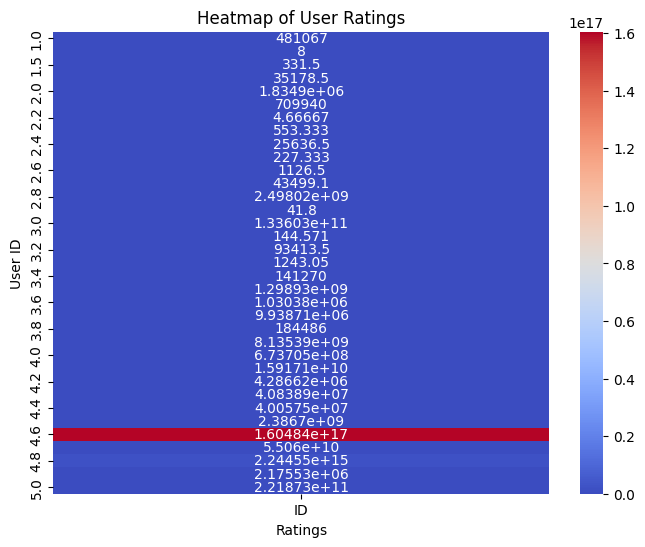

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data,annot=True,fmt='g',cmap='coolwarm',cbar=True)
plt.title('Heatmap of User Ratings')
plt.xlabel('Ratings')
plt.ylabel('User ID')
plt.show()

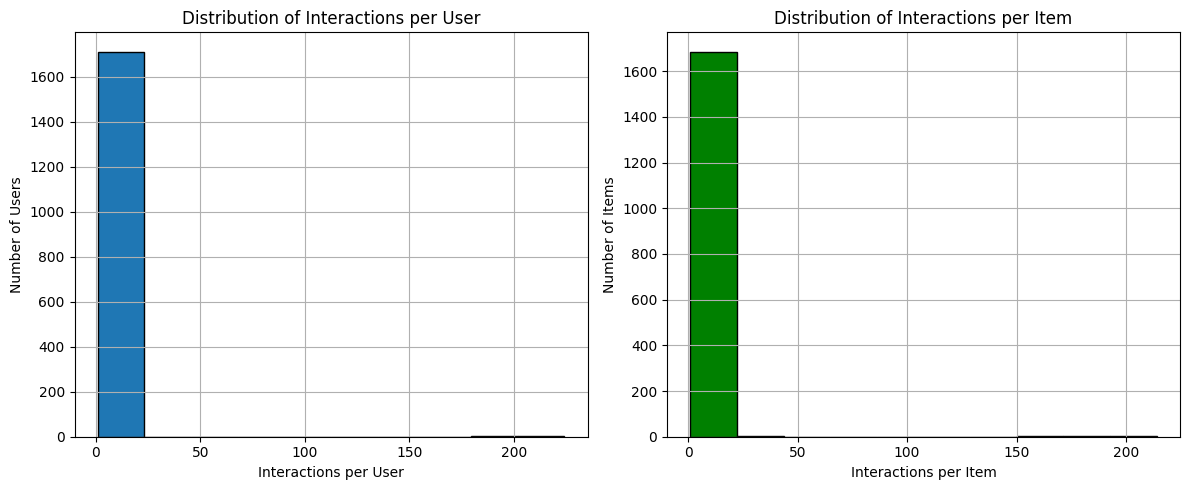

In [32]:
# Distribution of interactions
# Here's how the variables are typically interpreted in this context:

# X-axis (independent variable): This axis shows the ranges or bins of the counts of unique 'ID' values. It is the variable that is divided into intervals (bins) to categorize the frequency counts.

# Y-axis (dependent variable): This axis shows the frequency or count of how many unique 'ID' values fall into each range on the x-axis. It is dependent on the distribution of counts in the 'ID' column.
# With the subplot() function you can draw multiple plots in one figure:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
#the figure has 1 row, 2 columns, and this plot is the first plot.
train_data['ID'].value_counts().hist(bins=10,edgecolor='k') # edge color:-black
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')


plt.subplot(1,2,2)
#the figure has 1 row, 2 columns, and this plot is the second plot.
train_data['ProdID'].value_counts().hist(bins=10,edgecolor='k',color='green')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Most Popular Items')

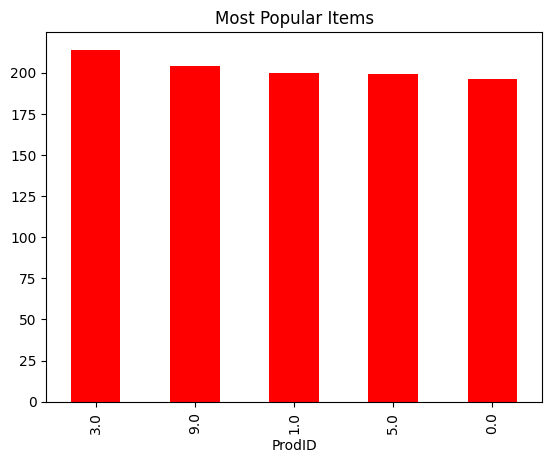

In [33]:
#Most popular items
popular_items = train_data['ProdID'].value_counts().head(5)
popular_items.plot(kind='bar',color='red')
plt.title("Most Popular Items")

<Axes: xlabel='Rating'>

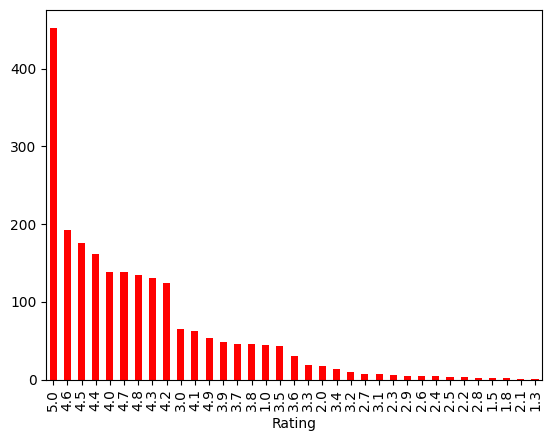

In [34]:
# Most rated Counts
train_data['Rating'].value_counts().plot(kind='bar',color='red')

# Step 3: Data Cleaning and Tags Creations

In [35]:
# To create tags

In [36]:
import spacy   # It is an NLP library and must be installed  with pip command
from spacy.lang.en.stop_words import STOP_WORDS

In [41]:
# Stop words are is,am,are that must be removed
nlp=spacy.load("en_core_web_sm") # it provide english model to perform tasks like sentiment analysis

def clean_and_extract_tags(text):
    if pd.isna(text):
        return ''
    text=str(text)
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS] # we are removing the numeric and  stopwords
    print(tags)
    return ', '.join(tags)



In [ ]:
# Tags generating columns are:- category,brand and description.
columns_to_extract_tags_from = ['Category', 'Brand', 'Description']

for column in columns_to_extract_tags_from:
    train_data[column] = train_data[column].apply(clean_and_extract_tags)

['premium', 'beauty', 'premium', 'makeup', 'premium', 'nail', 'polish', 'care', 'premium', 'nail', 'polish']
['beauty', 'hair', 'care', 'hair', 'color', 'auburn', 'hair', 'color']
['beauty', 'hair', 'care', 'hair', 'color', 'permanent', 'hair', 'color']
['beauty', 'makeup', 'lip']
['seasonal', 'stock', 'essentials', 'personal', 'care', 'stock', 'stock', 'shave']
['beauty', 'hair', 'care', 'hair', 'care', 'brands', 'old', 'spice', 'haircare']
['personal', 'care', 'oral', 'care', 'kids', 'oral', 'care']
['beauty', 'makeup', 'nails']
['beauty', 'hair', 'care', 'hair', 'care', 'brands', 'suave']
['health', 'lip', 'care', 'vaseline']
['seasonal', 'minute', 'gifts']
['beauty', 'nail', 'care', 'nail', 'polish', 'nail', 'lacquer']
['beauty', 'makeup', 'face', 'makeup', 'face', 'primer']
['personal', 'care', 'restock', 'save', 'hair', 'care', 'hair', 'sets']
['seasonal', 'clean', 'living', 'shop', 'wellness', 'clean', 'living', 'shop']
['beauty', 'hair', 'care', 'hair', 'color', 'auburn', 'hair

In [43]:
train_data.head()

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,NaN,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"premium, beauty, premium, makeup, premium, nai..."
1,9.500000e+01,76.0,NaN,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."
2,8.000000e+00,8.0,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, give...","beauty, hair, care, hair, color, permanent, ha..."
3,4.000000e+00,3.0,NaN,0.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"calling, matte, lip, lovers, indulge, rich, cr...","beauty, makeup, lip, kokie, cosmetics, calling..."
4,9.900000e+02,3.0,NaN,131.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"1971, gillette, introduced, trac, ii, razor, s...","seasonal, stock, essentials, personal, care, s..."


In [44]:
# Concatenate the cleaned tags from all relevant columns
train_data['Tags'] = train_data[columns_to_extract_tags_from].apply(lambda row: ', '.join(row), axis=1)

In [50]:
train_data.head(1)['Tags'].values

array(['premium, beauty, premium, makeup, premium, nail, polish, care, premium, nail, polish, opi, '],
      dtype=object)

# Rating Based Recommendations System

In [52]:
# We use Rating column as the key column

In [57]:
average_ratings=train_data.groupby(['Name','ReviewCount','Brand','ImageURL'])['Rating'].mean().reset_index()

In [60]:
top_rated_items=average_ratings.sort_values(by='Rating',ascending=False)

In [71]:
rating_base_recommendation=top_rated_items.head(10)

In [72]:
rating_base_recommendation

,Name,ReviewCount,Brand,ImageURL,Rating
3738,"Prell Shampoo, Classic Clean 13.50 oz (Pack of 4)",8.0,prell,https://i5.walmartimages.com/asr/591617a5-4b84...,5.0
4243,Shea Soft & Smooth Body Milk Spray 6.8 oz,3.0,ogx,https://i5.walmartimages.com/asr/a055cdd5-695b...,5.0
3645,Philips Sonicare HX9023/65 C2 Optimal Plaque C...,1.0,sonicare,https://i5.walmartimages.com/asr/767db079-1563...,5.0
3640,Peter Thomas Roth Water Drench Hyaluronic Clou...,2.0,"peter, thomas, roth",https://i5.walmartimages.com/asr/2178c851-e4ae...,5.0
1301,Colgate Total Whole Mouth Health Gel Toothpast...,1.0,colgate,https://i5.walmartimages.com/asr/51016094-008e...,5.0
3629,Perricone MD Face Finishing Moisturizer 118ml/...,2.0,"perricone, md",https://i5.walmartimages.com/asr/c958cad5-7996...,5.0
3623,Perfecting Neck and Decollete Cream,1.0,"pca, skin",https://i5.walmartimages.com/asr/7d49107b-85a2...,5.0
1311,Colorescience Sunforgettable Brush On Sunscree...,3.0,colorescience,https://i5.walmartimages.com/asr/e4582fe9-7bc7...,5.0
3621,"Perfect Bar, Dark Chocolate Chip Peanut Butter...",2.0,"perfect, bar",https://i5.walmartimages.com/asr/8a3dfffc-0f47...,5.0
1319,Comfort Bath Heavyweight Aloe Cleansing Washcl...,2.0,sage,https://i5.walmartimages.com/asr/c2a4f9f1-0e3e...,5.0


# The rating are comming in float and reviewCount is also in float so to correct it into int

In [74]:
rating_base_recommendation['Rating']=rating_base_recommendation['Rating'].astype(int)
rating_base_recommendation['ReviewCount']=rating_base_recommendation['ReviewCount'].astype(int)


C:\Users\Vishnu\AppData\Local\Temp\ipykernel_16108\2453683496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['Rating']=rating_base_recommendation['Rating'].astype(int)
C:\Users\Vishnu\AppData\Local\Temp\ipykernel_16108\2453683496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['ReviewCount']=rating_base_recommendation['ReviewCount'].astype(int)


In [75]:
rating_base_recommendation

,Name,ReviewCount,Brand,ImageURL,Rating
3738,"Prell Shampoo, Classic Clean 13.50 oz (Pack of 4)",8,prell,https://i5.walmartimages.com/asr/591617a5-4b84...,5
4243,Shea Soft & Smooth Body Milk Spray 6.8 oz,3,ogx,https://i5.walmartimages.com/asr/a055cdd5-695b...,5
3645,Philips Sonicare HX9023/65 C2 Optimal Plaque C...,1,sonicare,https://i5.walmartimages.com/asr/767db079-1563...,5
3640,Peter Thomas Roth Water Drench Hyaluronic Clou...,2,"peter, thomas, roth",https://i5.walmartimages.com/asr/2178c851-e4ae...,5
1301,Colgate Total Whole Mouth Health Gel Toothpast...,1,colgate,https://i5.walmartimages.com/asr/51016094-008e...,5
3629,Perricone MD Face Finishing Moisturizer 118ml/...,2,"perricone, md",https://i5.walmartimages.com/asr/c958cad5-7996...,5
3623,Perfecting Neck and Decollete Cream,1,"pca, skin",https://i5.walmartimages.com/asr/7d49107b-85a2...,5
1311,Colorescience Sunforgettable Brush On Sunscree...,3,colorescience,https://i5.walmartimages.com/asr/e4582fe9-7bc7...,5
3621,"Perfect Bar, Dark Chocolate Chip Peanut Butter...",2,"perfect, bar",https://i5.walmartimages.com/asr/8a3dfffc-0f47...,5
1319,Comfort Bath Heavyweight Aloe Cleansing Washcl...,2,sage,https://i5.walmartimages.com/asr/c2a4f9f1-0e3e...,5


In [76]:
print("Rating Base Recommendation System: (Trending Products)")
rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']]=rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']]

Rating Base Recommendation System: (Trending Products)


C:\Users\Vishnu\AppData\Local\Temp\ipykernel_16108\4280166341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']]=rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']]


In [77]:
rating_base_recommendation

,Name,ReviewCount,Brand,ImageURL,Rating
3738,"Prell Shampoo, Classic Clean 13.50 oz (Pack of 4)",8,prell,https://i5.walmartimages.com/asr/591617a5-4b84...,5
4243,Shea Soft & Smooth Body Milk Spray 6.8 oz,3,ogx,https://i5.walmartimages.com/asr/a055cdd5-695b...,5
3645,Philips Sonicare HX9023/65 C2 Optimal Plaque C...,1,sonicare,https://i5.walmartimages.com/asr/767db079-1563...,5
3640,Peter Thomas Roth Water Drench Hyaluronic Clou...,2,"peter, thomas, roth",https://i5.walmartimages.com/asr/2178c851-e4ae...,5
1301,Colgate Total Whole Mouth Health Gel Toothpast...,1,colgate,https://i5.walmartimages.com/asr/51016094-008e...,5
3629,Perricone MD Face Finishing Moisturizer 118ml/...,2,"perricone, md",https://i5.walmartimages.com/asr/c958cad5-7996...,5
3623,Perfecting Neck and Decollete Cream,1,"pca, skin",https://i5.walmartimages.com/asr/7d49107b-85a2...,5
1311,Colorescience Sunforgettable Brush On Sunscree...,3,colorescience,https://i5.walmartimages.com/asr/e4582fe9-7bc7...,5
3621,"Perfect Bar, Dark Chocolate Chip Peanut Butter...",2,"perfect, bar",https://i5.walmartimages.com/asr/8a3dfffc-0f47...,5
1319,Comfort Bath Heavyweight Aloe Cleansing Washcl...,2,sage,https://i5.walmartimages.com/asr/c2a4f9f1-0e3e...,5


# Content Based Recommendation

In [80]:
#let us first view our dataset

In [79]:
train_data.head()

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,NaN,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"premium, beauty, premium, makeup, premium, nai..."
1,9.500000e+01,76.0,NaN,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."
2,8.000000e+00,8.0,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, give...","beauty, hair, care, hair, color, permanent, ha..."
3,4.000000e+00,3.0,NaN,0.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"calling, matte, lip, lovers, indulge, rich, cr...","beauty, makeup, lip, kokie, cosmetics, calling..."
4,9.900000e+02,3.0,NaN,131.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"1971, gillette, introduced, trac, ii, razor, s...","seasonal, stock, essentials, personal, care, s..."


In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [95]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english') # Removing the stop words in tags that are not needed
tfidf_matrix_content=tfidf_vectorizer.fit_transform(train_data['Tags']) # Converting the tags into vectors

In [96]:
#To find cosign similarity between all the matrics

In [98]:
consine_similarities_content=cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

In [99]:
consine_similarities_content

array([[1.        , 0.00347577, 0.00363226, ..., 0.1353583 , 0.31726435,
        0.05689149],
       [0.00347577, 1.        , 0.38086046, ..., 0.02315371, 0.00183907,
        0.03810538],
       [0.00363226, 0.38086046, 1.        , ..., 0.03960102, 0.00192187,
        0.05910983],
       ...,
       [0.1353583 , 0.02315371, 0.03960102, ..., 1.        , 0.00123005,
        0.03793039],
       [0.31726435, 0.00183907, 0.00192187, ..., 0.00123005, 1.        ,
        0.00544411],
       [0.05689149, 0.03810538, 0.05910983, ..., 0.03793039, 0.00544411,
        1.        ]])

In [110]:
consine_similarities_content[0].shape 

(5000,)

In [111]:
consine_similarities_content.shape

(5000, 5000)

so it means that it is the similarity of the first data with all other data in first row

In [112]:
train_data.shape

(5000, 10)

In [125]:
 item_name='OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
item_index=train_data[train_data['Name']==item_name].index[0]


In [120]:
## Now taking the similarity of the item_name data with all other data

In [128]:
consine_similarities_content[item_index]

array([1.        , 0.00347577, 0.00363226, ..., 0.1353583 , 0.31726435,
       0.05689149])

In [121]:
# we have calculated above

In [131]:
similar_items=list(enumerate(consine_similarities_content[item_index]))  #enumerate give the given similarity with index of the item

In [132]:
similar_items

[(0, 1.0),
 (1, 0.0034757732312750934),
 (2, 0.0036322613839184243),
 (3, 0.013151377769582695),
 (4, 0.0010160292668413842),
 (5, 0.006575809352364544),
 (6, 0.007328463323503306),
 (7, 0.051511554243593015),
 (8, 0.011109860476686884),
 (9, 0.003151730172379002),
 (10, 0.0),
 (11, 0.15874576284976777),
 (12, 0.040980083610443314),
 (13, 0.0030468898686792107),
 (14, 0.0),
 (15, 0.0059693458494800575),
 (16, 0.3398806576145607),
 (17, 0.0),
 (18, 0.004556103655641239),
 (19, 0.0038887588090144405),
 (20, 0.008764149884645191),
 (21, 0.0),
 (22, 0.009458897953602717),
 (23, 0.0),
 (24, 0.005175585505049849),
 (25, 0.0),
 (26, 0.007172857177991527),
 (27, 0.0032598848338519053),
 (28, 0.2812052802661157),
 (29, 0.0),
 (30, 0.007207084216281134),
 (31, 0.006229511383962109),
 (32, 0.008773214115073319),
 (33, 0.010764957375515105),
 (34, 0.005638510010303097),
 (35, 0.01026020396150954),
 (36, 0.002016411915247683),
 (37, 0.003278201368366633),
 (38, 0.005164021192923341),
 (39, 0.0),
 (

In [133]:
# Now sorteing the items to get the items with maximum similarity

In [139]:
similar_items = sorted(similar_items,key=lambda x:x[1],reverse=True)

In [141]:
# sorted(iterable, key=None, reverse=False)
# iterable: The collection to be sorted (e.g., list, tuple, string).
# key: (Optional) A function that serves as a key for the sort comparison.
# reverse: (Optional) If True, the sorted list is in descending order. If False (the default), the list is sorted in ascending order.

In [142]:
similar_items

[(0, 1.0),
 (156, 1.0),
 (184, 1.0),
 (205, 1.0),
 (237, 1.0),
 (325, 1.0),
 (375, 1.0),
 (402, 1.0),
 (706, 1.0),
 (886, 1.0),
 (1042, 1.0),
 (1108, 1.0),
 (1215, 1.0),
 (1257, 1.0),
 (1280, 1.0),
 (1346, 1.0),
 (1442, 1.0),
 (1575, 1.0),
 (1594, 1.0),
 (1633, 1.0),
 (1654, 1.0),
 (1687, 1.0),
 (1743, 1.0),
 (1747, 1.0),
 (1853, 1.0),
 (1883, 1.0),
 (1895, 1.0),
 (1896, 1.0),
 (1984, 1.0),
 (1991, 1.0),
 (2027, 1.0),
 (2101, 1.0),
 (2159, 1.0),
 (2355, 1.0),
 (2418, 1.0),
 (2484, 1.0),
 (2485, 1.0),
 (2510, 1.0),
 (2511, 1.0),
 (2514, 1.0),
 (2548, 1.0),
 (2564, 1.0),
 (2576, 1.0),
 (2710, 1.0),
 (2748, 1.0),
 (2904, 1.0),
 (2952, 1.0),
 (2977, 1.0),
 (3015, 1.0),
 (3052, 1.0),
 (3199, 1.0),
 (3202, 1.0),
 (3211, 1.0),
 (3236, 1.0),
 (3252, 1.0),
 (3253, 1.0),
 (3299, 1.0),
 (3366, 1.0),
 (3460, 1.0),
 (3639, 1.0),
 (3691, 1.0),
 (3692, 1.0),
 (3719, 1.0),
 (3852, 1.0),
 (3873, 1.0),
 (3967, 1.0),
 (3987, 1.0),
 (4010, 1.0),
 (4100, 1.0),
 (4109, 1.0),
 (4122, 1.0),
 (4190, 1.0),
 (42

In [143]:
# To view the top most 5 similar items :-

In [144]:
top_similar_items=similar_items[1:10]

In [145]:
top_similar_items

[(156, 1.0),
 (184, 1.0),
 (205, 1.0),
 (237, 1.0),
 (325, 1.0),
 (375, 1.0),
 (402, 1.0),
 (706, 1.0),
 (886, 1.0)]

In [146]:
#To show the names of top similar items

In [148]:
recommended_items_indics = [x[0] for  x in top_similar_items]


In [156]:
train_data.iloc[recommended_items_indics][['Name','ReviewCount','Brand']]

,Name,ReviewCount,Brand
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi


In [165]:
train_data.head(4)['Name'][3]

'Kokie Professional Matte Lipstick, Hot Berry, 0.14 fl oz'

# Now Trying to create the function of the content based  recomendation system

In [157]:
def content_based_recommendations(train_data, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in train_data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Create a TF-IDF vectorizer for item descriptions
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = train_data[train_data['Name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the top similar items
    recommended_items_details = train_data.iloc[recommended_item_indices][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details

In [166]:
content_based_recommendations(train_data,'Kokie Professional Matte Lipstick, Hot Berry, 0.14 fl oz',8)

,Name,ReviewCount,Brand,ImageURL,Rating
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,NaN
546,"Kokie Professional Matte Lipstick, Kiss Me, 0....",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/27dd82a2-2b9c...,NaN
2406,"L.A. Colors Matte Lipstick, Tender Matte",3.0,colors,https://i5.walmartimages.com/asr/271264fb-e8c3...,3.7
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
4084,e.l.f. Mad for Matte 4 Piece Lip Color Set,0.0,cosmetics,https://i5.walmartimages.com/asr/e2d30304-edc9...,NaN
1559,"LOreal Paris Colour Riche Matte Lip Liner, Mat...",495.0,paris,https://i5.walmartimages.com/asr/baf97085-7231...,4.4
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
3023,Be Matte Lipstick - Pink,2.0,"city, color",https://i5.walmartimages.com/asr/4425a13e-085f...,3.0


In [168]:
 # we can see our content base approach is working fine

# Collaborative Filtering(User Item Similarity)

In [174]:
user_item_matrix=train_data.pivot_table(index='ID',columns='ProdID',values='Rating',aggfunc='mean').fillna(0).astype(int)

In [175]:
user_item_matrix

ProdID,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,9.000000e+00,...,1.001111e+42,1.005509e+42,1.007940e+42,1.008730e+42,1.030521e+42,1.030521e+42,1.030521e+42,1.076430e+42,5.002240e+42,5.005509e+42
ID,,,,,,,,,,,,,,,,,,,,,
0.000000e+00,4,4,4,4,4,0,4,3,5,4,...,0,0,0,0,0,0,0,5,0,0
1.000000e+00,4,0,4,3,4,4,4,4,0,4,...,0,0,4,0,0,5,0,0,0,0
2.000000e+00,4,4,4,4,4,4,4,4,3,4,...,0,0,4,0,0,0,0,0,0,4
3.000000e+00,4,4,4,4,2,4,4,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4.000000e+00,4,2,3,4,4,4,2,4,4,4,...,0,0,4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.799034e+12,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
8.684094e+12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9.967409e+13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
# The first row signifies that the user 1 has given 4 rating to product 1, 4ratings to product 2,4ratings to product 3,4ratings to product 4,
# 4ratings to product 5,0ratings to product 6,4ratings to product 7,3ratings to product 8,5ratings to product 9,4ratings to product 10

In [176]:
# Now to calculate the cosine the similarity

In [185]:
user_similarity=cosine_similarity(user_item_matrix)  #similar to  user_similarity=cosine_similarity(user_item_matrix,user_item_matrix)

In [186]:
user_similarity.shape

(843, 843)

In [191]:
#suppose the new user  with  target_user_id = 4 comes to our website than we calcualte the similarity
target_user_id=4
# first we see that the user exist in our dataset
target_user_index=user_item_matrix.index.get_loc(target_user_id)
target_user_index

4

In [192]:
#The target user exist in our dataset and now finding its similarity with other users

In [206]:
new_user_similarity= user_similarity[target_user_index]
new_user_similarity

array([0.18680328, 0.19558453, 0.20002152, 0.18558851, 1.        ,
       0.26206917, 0.25261793, 0.23336987, 0.22108297, 0.279433  ,
       0.30130276, 0.10540745, 0.185952  , 0.02212043, 0.16149861,
       0.04024015, 0.07066176, 0.08048029, 0.1472358 , 0.1522552 ,
       0.10060036, 0.11047195, 0.11047195, 0.11745354, 0.03018011,
       0.09839655, 0.09963675, 0.20504559, 0.06397294, 0.11712536,
       0.12669467, 0.14577326, 0.14539597, 0.0557856 , 0.08778375,
       0.15616715, 0.1487616 , 0.07247328, 0.13502084, 0.09247576,
       0.        , 0.09442575, 0.16096058, 0.12290484, 0.1422704 ,
       0.1440378 , 0.14256548, 0.06343216, 0.04981838, 0.0557856 ,
       0.09569351, 0.11100628, 0.18495152, 0.05462437, 0.09834597,
       0.18219501, 0.04784675, 0.14335552, 0.16132234, 0.11479414,
       0.1508718 , 0.14315322, 0.12072044, 0.14825818, 0.18118321,
       0.22925702, 0.12062853, 0.06866733, 0.23925818, 0.06031426,
       0.17838184, 0.1522552 , 0.14272236, 0.1601367 , 0.06441

In [195]:
# Now sorting and calculateing the similarity

In [207]:
similar_user_indices = new_user_similarity.argsort()[::-1][1:]

In [208]:
recommend_items = []

for user_index in similar_user_indices:
    rated_by_similar_user = user_item_matrix.iloc[user_index]
    not_rated_by_target_user = (rated_by_similar_user==0) & (user_item_matrix.iloc[target_user_index]==0)
    
    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

recommended_items_details = train_data[train_data['ProdID'].isin(recommend_items)][['Name','ReviewCount','Brand','ImageURL','Rating']]

In [209]:
recommended_items_details

,Name,ReviewCount,Brand,ImageURL,Rating
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
86,LOreal Paris Feria Multi-Faceted Shimmering Pe...,2144.0,paris,https://i5.walmartimages.com/asr/c229026a-2b75...,3.1
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0
144,Covidien Curity Maternity Pad Heavy 4.33&quot ...,0.0,covidien,https://i5.walmartimages.com/asr/e4e38217-ed43...,NaN
...,...,...,...,...,...
4752,"OPI Infinite Shine Nail Polish, Let Love Spark...",3.0,opi,https://i5.walmartimages.com/asr/7eef48ac-3a28...,4.0
4780,Burberry Touch Eau de Toilette Cologne for Men...,1.0,burberry,https://i5.walmartimages.com/asr/dae0dee0-e1bc...,5.0
4876,GOJO Fast Towels - 225 Count Bucket,0.0,gojo,https://i5.walmartimages.com/asr/ac84dbbe-77ff...,NaN
4907,"Natures Truth Essential Oil Roll-On Blend, Lav...",4.0,"nature, truth",https://i5.walmartimages.com/asr/eab8c2f9-0797...,4.5


# Function That Recommend Items

In [218]:
def collaborative_filtering_recommendations(train_data, target_user_id, top_n=10):
    # Create the user-item matrix
    user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)

    # Calculate the user similarity matrix using cosine similarity
    user_similarity = cosine_similarity(user_item_matrix)

    # Find the index of the target user in the matrix
    target_user_index = user_item_matrix.index.get_loc(target_user_id)

    # Get the similarity scores for the target user
    user_similarities = user_similarity[target_user_index]

    # Sort the users by similarity in descending order (excluding the target user)
    similar_users_indices = user_similarities.argsort()[::-1][1:]

    # Generate recommendations based on similar users
    recommended_items = []

    for user_index in similar_users_indices:
        # Get items rated by the similar user but not by the target user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)

        # Extract the item IDs of recommended items
        recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])

    # Get the details of recommended items
    recommended_items_details = train_data[train_data['ProdID'].isin(recommended_items)][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details.head(top_n)

# Example usage
target_user_id = 4
top_n = 5
collaborative_filtering_rec = collaborative_filtering_recommendations(train_data, target_user_id,top_n)
print(f"Top {top_n} recommendations for User {target_user_id}:")
collaborative_filtering_rec

Top 5 recommendations for User 4:


,Name,ReviewCount,Brand,ImageURL,Rating
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0
155,"Crest 3D White Brilliance Mouthwash, Alcohol F...",63.0,crest,https://i5.walmartimages.com/asr/1fcc5525-9ae3...,NaN
174,COVERGIRL Outlast All-Day Moisturizing Lip Col...,36.0,covergirl,https://i5.walmartimages.com/asr/4479896f-c6c4...,NaN


# Hybrid Recommendations

In [219]:
# Hybrid Recommendations (Combine Content-Based and Collaborative Filtering)
def hybrid_recommendations(train_data,target_user_id, item_name, top_n=10):
    # Get content-based recommendations
    content_based_rec = content_based_recommendations(train_data,item_name, top_n)

    # Get collaborative filtering recommendations
    collaborative_filtering_rec = collaborative_filtering_recommendations(train_data,target_user_id, top_n)
    
    # Merge and deduplicate the recommendations
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()
    
    return hybrid_rec.head(10)

In [220]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 4 # Change this to the user_id you want recommendations for
item_name = "OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11"  # Change this to the item name
hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 4 and Item 'OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11':


,Name,ReviewCount,Brand,ImageURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,NaN
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,NaN
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,NaN
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,NaN
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,NaN
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi,https://i5.walmartimages.com/asr/98b4194c-e026...,NaN
1042,"OPI GelColor Gel Nail Polish, Dulce De Leche, ...",1.0,opi,https://i5.walmartimages.com/asr/c1b2c370-b2d2...,NaN


In [221]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 10 # Change this to the user_id you want recommendations for
item_name = 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum'

hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 10 and Item 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum':


,Name,ReviewCount,Brand,ImageURL,Rating
896,"Black Radiance Perfect Tone Lip Color, Vintage...",78.0,"black, radiance",https://i5.walmartimages.com/asr/485f26b4-a19a...,4.7
2496,"Black Radiance Perfect Tone Lip Color, Hollywo...",18.0,"black, radiance",https://i5.walmartimages.com/asr/fe3da48f-5142...,4.3
3,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/25b4b467-bc61...,NaN
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,NaN
2406,"L.A. Colors Matte Lipstick, Tender Matte",3.0,colors,https://i5.walmartimages.com/asr/271264fb-e8c3...,3.7
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
4872,"L.A. Colors Matte Lipstick, Torrid Matte",8.0,colors,https://i5.walmartimages.com/asr/62d6d9fa-eee1...,4.8
1300,"e.l.f. Liquid Matte Lipstick, Tea Rose",476.0,cosmetics,https://i5.walmartimages.com/asr/58220de4-3875...,4.1
420,Black Opal Color Splurge Sassy Luxe Matte Lips...,0.0,"black, opal",https://i5.walmartimages.com/asr/a991241b-e4ad...,NaN
